In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("thyroidDF.csv")

In [3]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [5]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [7]:
df.shape

(9172, 31)

In [8]:
df[df.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
2976,455,F,f,f,f,f,f,f,f,f,...,118.0,t,1.13,t,104.0,f,NaN,SVI,-,850530001
5710,65511,M,f,f,f,f,f,f,f,f,...,113.0,t,1.08,t,104.0,f,NaN,other,-,860210008
6392,65512,M,f,f,f,f,f,f,f,f,...,112.0,t,0.84,t,133.0,f,NaN,other,-,860403050
8105,65526,F,f,f,f,f,f,f,f,f,...,132.0,t,1.02,t,129.0,f,NaN,other,-,861014041


In [9]:
df=df[df['age']<=100]

In [10]:
df.target.unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [11]:
map_target={
    '-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid", 
           'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
           'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid", 
           'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", 
           "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
    
}

In [12]:
df['target']=df['target'].map(map_target)

In [13]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2603
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8819
referral_source           0
target                 1493
patient_id                0
dtype: int64

In [14]:
df['target']=df['target'].fillna('Unknown')

In [15]:
df.shape
df['target'].unique()

array(['Negative', 'Unknown', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [16]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,Negative,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,Negative,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,Negative,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,Negative,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,Unknown,840803047


In [17]:

df.drop(columns=['TBG','patient_id','TT4_measured','T4U_measured','TBG_measured','FTI_measured','T3_measured','TSH_measured'], inplace=True)

In [18]:
df.sample(20)
df.shape

(9168, 23)

In [19]:
df['sex'] = df['sex'].fillna('M')
df['TSH'] = df['TSH'].fillna(df['TSH'].median())
df['T3'] = df['T3'].fillna(0)
df['TT4'] = df['TT4'].fillna(df['TT4'].median())
df['T4U'] = df['T4U'].fillna(df['T4U'].mean())
df['FTI'] = df['FTI'].fillna(df['FTI'].mean())


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9168 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9168 non-null   int64  
 1   sex                  9168 non-null   object 
 2   on_thyroxine         9168 non-null   object 
 3   query_on_thyroxine   9168 non-null   object 
 4   on_antithyroid_meds  9168 non-null   object 
 5   sick                 9168 non-null   object 
 6   pregnant             9168 non-null   object 
 7   thyroid_surgery      9168 non-null   object 
 8   I131_treatment       9168 non-null   object 
 9   query_hypothyroid    9168 non-null   object 
 10  query_hyperthyroid   9168 non-null   object 
 11  lithium              9168 non-null   object 
 12  goitre               9168 non-null   object 
 13  tumor                9168 non-null   object 
 14  hypopituitary        9168 non-null   object 
 15  psych                9168 non-null   object

In [21]:
from scipy import stats

In [22]:
features = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']  # List of columns to test
target_groups = ['Hyperthyroid', 'Hypothyroid', 'Negative','Unknown']

for feature in features:
    anova_result = stats.f_oneway(
        df[df['target'] == 'Hyperthyroid'][feature],
        df[df['target'] == 'Hypothyroid'][feature],
        df[df['target'] == 'Negative'][feature]
    )
    print(f"ANOVA result for {feature}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA result for age: F-statistic = 11.244505192156309, p-value = 1.3295874449168426e-05
ANOVA result for TSH: F-statistic = 1006.7633800940628, p-value = 0.0
ANOVA result for T3: F-statistic = 439.3190954671531, p-value = 2.3067752478571121e-181
ANOVA result for TT4: F-statistic = 1615.8721301492742, p-value = 0.0
ANOVA result for T4U: F-statistic = 17.609234603427264, p-value = 2.3437228905663936e-08
ANOVA result for FTI: F-statistic = 1939.0260210204287, p-value = 0.0


In [23]:
from scipy.stats import chi2_contingency
features = [
    'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 
    'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych'
]


In [24]:
results = {}
for feature in features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['target'])
    
    # Perform Chi-Square Test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    results[feature] = {
        'Chi2 Stat': chi2_stat,
        'P-Value': p_value,
        'Degrees of Freedom': dof
    }

In [25]:
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"  Chi2 Stat: {result['Chi2 Stat']:.4f}")
    print(f"  P-Value: {result['P-Value']:.4f}")
    print(f"  Degrees of Freedom: {result['Degrees of Freedom']}")
    print("-" * 40)

Feature: sex
  Chi2 Stat: 59.1772
  P-Value: 0.0000
  Degrees of Freedom: 3
----------------------------------------
Feature: on_thyroxine
  Chi2 Stat: 292.4508
  P-Value: 0.0000
  Degrees of Freedom: 3
----------------------------------------
Feature: query_on_thyroxine
  Chi2 Stat: 2.9845
  P-Value: 0.3940
  Degrees of Freedom: 3
----------------------------------------
Feature: on_antithyroid_meds
  Chi2 Stat: 9.2016
  P-Value: 0.0267
  Degrees of Freedom: 3
----------------------------------------
Feature: sick
  Chi2 Stat: 3.2126
  P-Value: 0.3600
  Degrees of Freedom: 3
----------------------------------------
Feature: pregnant
  Chi2 Stat: 199.9021
  P-Value: 0.0000
  Degrees of Freedom: 3
----------------------------------------
Feature: thyroid_surgery
  Chi2 Stat: 8.8884
  P-Value: 0.0308
  Degrees of Freedom: 3
----------------------------------------
Feature: I131_treatment
  Chi2 Stat: 0.3819
  P-Value: 0.9440
  Degrees of Freedom: 3
---------------------------------------

In [26]:
df.drop(columns=['query_on_thyroxine','I131_treatment','sick'],inplace=True)

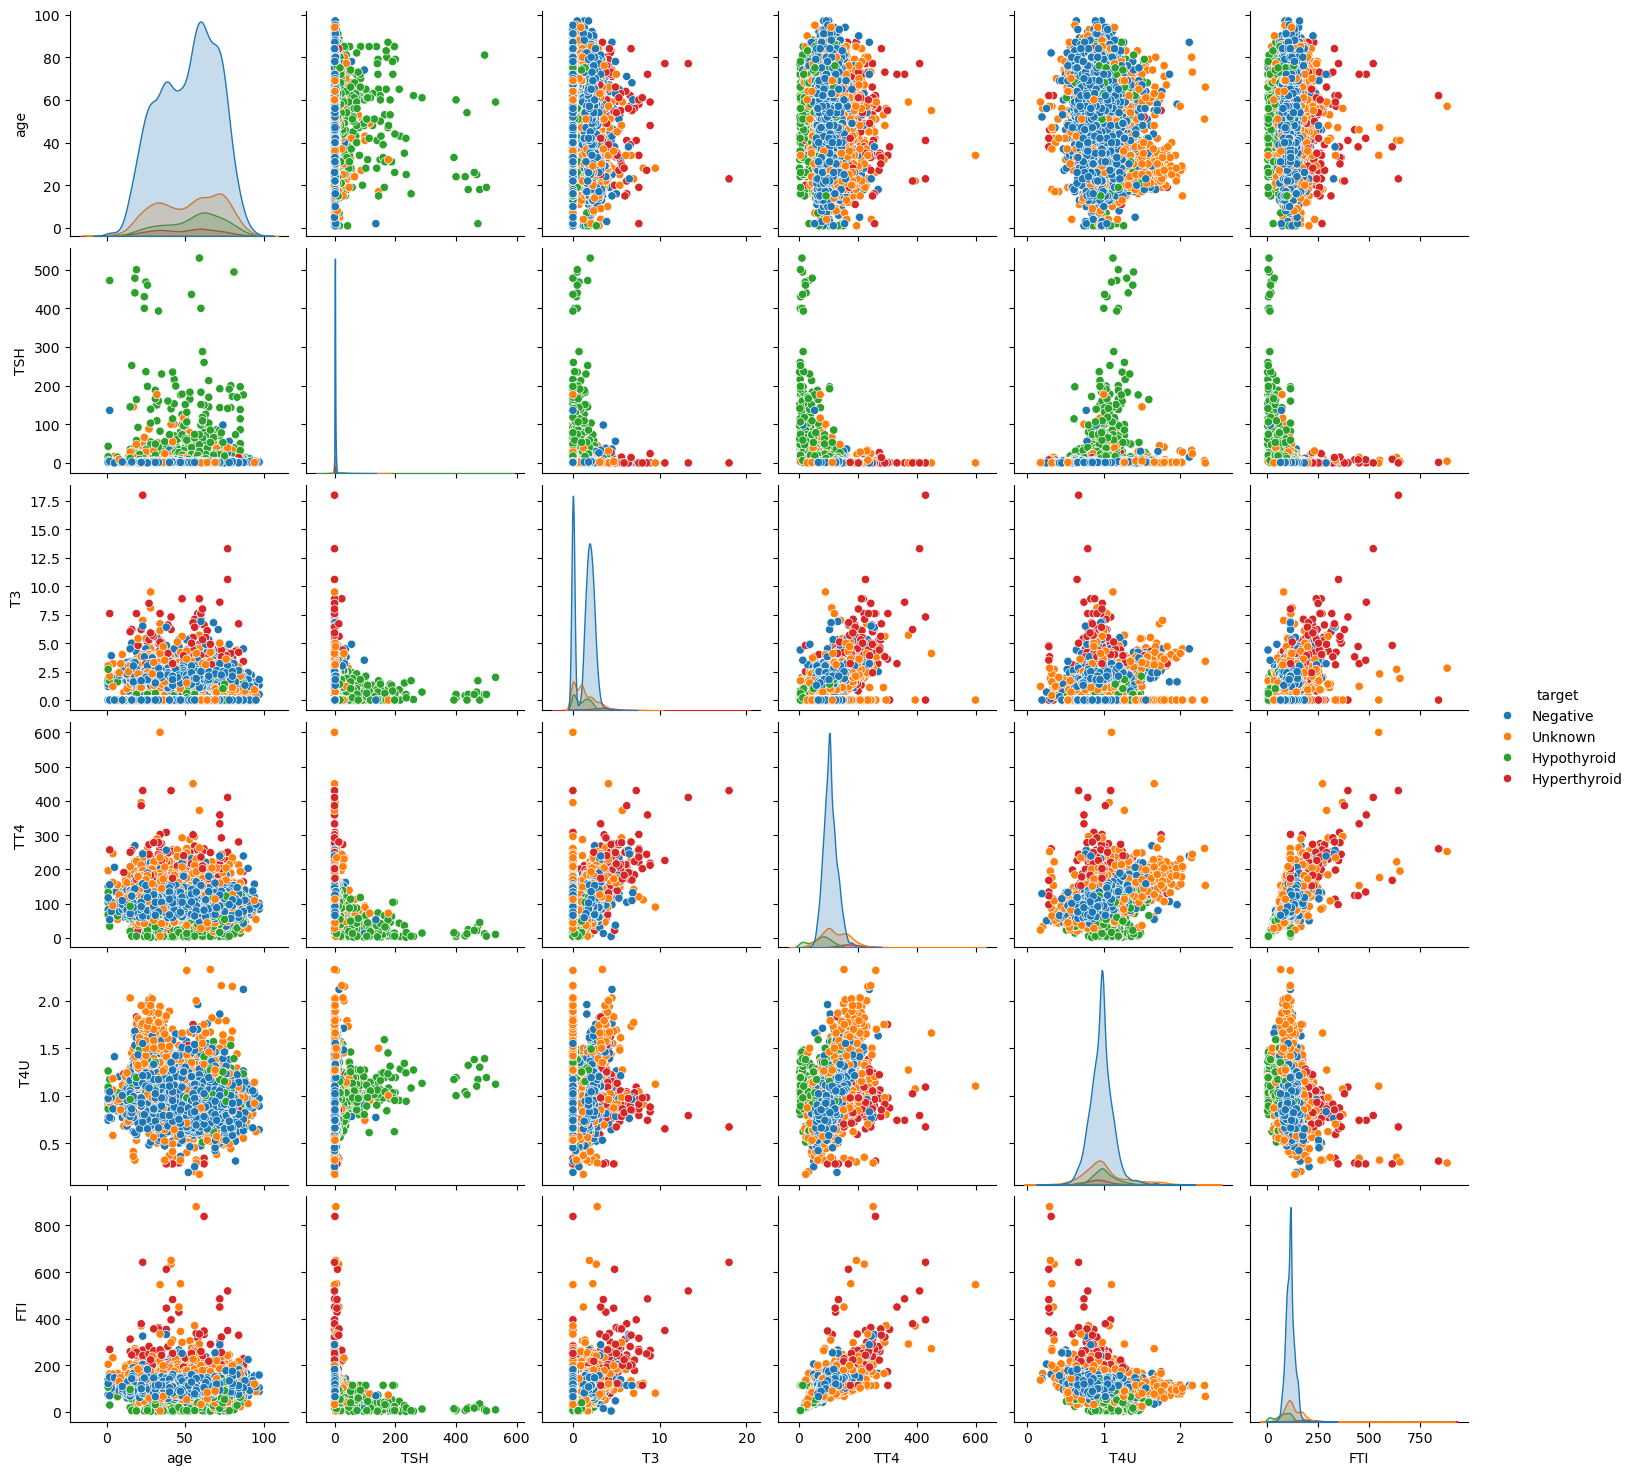

In [27]:
sns.pairplot(data=df,hue='target')
plt.show()
#pairplots helps to identify correlation,clustering patterns,outliers,how each classes are separated,overlapping

In [28]:
df.replace('f',0,inplace=True)
df.replace('t',1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24960\1911443418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('t',1,inplace=True)


In [29]:
df.replace('M',0,inplace=True)
df.replace('F',1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24960\3248920024.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('F',1,inplace=True)


In [30]:
df1=df.copy()

In [31]:
df1['total_medical_condition']=(df1['on_thyroxine'] | df1['thyroid_surgery'] | df1['on_antithyroid_meds'] | df1['goitre'] | df1['tumor'])

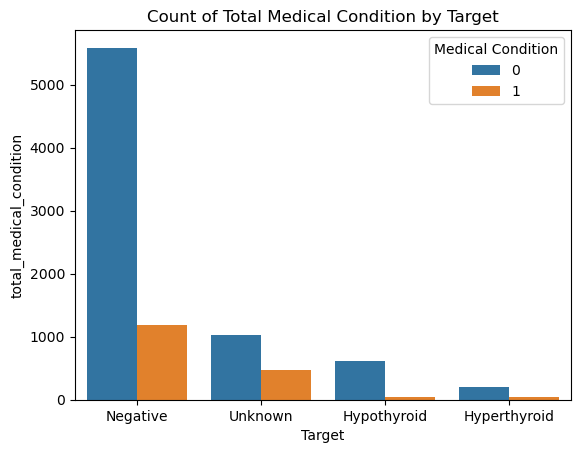

In [32]:
sns.countplot(data=df1, x='target', hue='total_medical_condition')
plt.xlabel('Target')
plt.ylabel('total_medical_condition')
plt.title('Count of Total Medical Condition by Target')
plt.legend(title='Medical Condition', labels=['0', '1'])
plt.show()

In [33]:
heatmap_data = pd.crosstab(index=[df1['total_medical_condition'], df1['target']], columns=df1['target'])
plt.show()

In [34]:
print(heatmap_data)

target                                Hyperthyroid  Hypothyroid  Negative  \
total_medical_condition target                                              
0                       Hyperthyroid           204            0         0   
                        Hypothyroid              0          621         0   
                        Negative                 0            0      5584   
                        Unknown                  0            0         0   
1                       Hyperthyroid            37            0         0   
                        Hypothyroid              0           46         0   
                        Negative                 0            0      1183   
                        Unknown                  0            0         0   

target                                Unknown  
total_medical_condition target                 
0                       Hyperthyroid        0  
                        Hypothyroid         0  
                        Negative     

In [35]:
total_medical_0=df1[df1['total_medical_condition']==0]
total_medical_1=df1[df1['total_medical_condition']==1]

In [36]:
df1.head()

,age,sex,on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target,total_medical_condition
0,29,1,0,0,0,0,1,0,0,0,...,0,0,0.3,0.0,104.0,0.976036,113.6389,other,Negative,0
1,29,1,0,0,0,0,0,0,0,0,...,0,0,1.6,1.9,128.0,0.976036,113.6389,other,Negative,0
2,41,1,0,0,0,0,0,1,0,0,...,0,0,1.4,0.0,104.0,0.976036,113.6389,other,Negative,0
3,36,1,0,0,0,0,0,0,0,0,...,0,0,1.4,0.0,104.0,0.976036,113.6389,other,Negative,0
4,32,1,0,0,0,0,0,0,0,0,...,0,0,1.4,0.0,104.0,0.976036,113.6389,other,Unknown,0


Text(0, 0.5, 'Count')

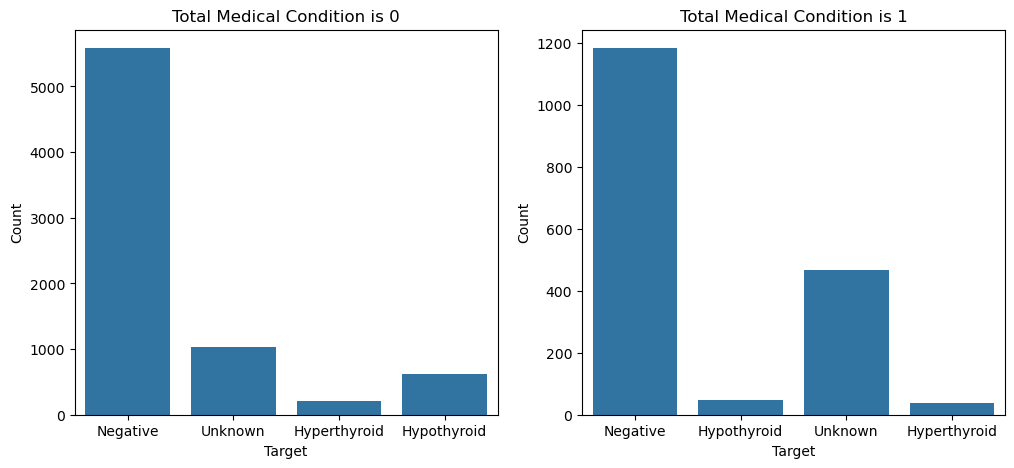

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='target', data=total_medical_0, ax=axes[0])
axes[0].set_title('Total Medical Condition is 0')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')
sns.countplot(x='target', data=total_medical_1, ax=axes[1])
axes[1].set_title('Total Medical Condition is 1')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')

In [38]:
count=(df1['target']=='Negative').sum()
count

6767

In [39]:
le1 = LabelEncoder()
le2=LabelEncoder()
df['target'] = le1.fit_transform(df['target'])
df['referral_source'] = le2.fit_transform(df['referral_source'])
df1['target'] = le1.fit_transform(df1['target'])
df1['referral_source'] = le2.fit_transform(df1['referral_source'])

In [40]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target
0,29,1,0,0,0,0,1,0,0,0,0,0,0,0.3,0.0,104.0,0.976036,113.6389,5,2
1,29,1,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.976036,113.6389,5,2
2,41,1,0,0,0,0,0,1,0,0,0,0,0,1.4,0.0,104.0,0.976036,113.6389,5,2
3,36,1,0,0,0,0,0,0,0,0,0,0,0,1.4,0.0,104.0,0.976036,113.6389,5,2
4,32,1,0,0,0,0,0,0,0,0,0,0,0,1.4,0.0,104.0,0.976036,113.6389,5,3


In [41]:
df['referral_source'].unique()

array([5, 3, 1, 0, 2, 4])

In [42]:
df.corr()

,age,sex,on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target
age,1.000000,0.009034,0.004392,-0.048851,-0.120397,-0.026549,0.041094,-0.041889,-0.033001,-0.062016,-0.048134,-0.020779,-0.078275,-0.018015,-0.072679,-0.059229,-0.153290,0.019269,0.029903,-0.002429
sex,0.009034,1.000000,0.111859,0.031333,0.069026,0.040866,0.077323,0.071502,-0.028962,0.010591,0.076992,-0.005066,-0.094854,0.030815,-0.024673,0.136052,0.222314,-0.008359,0.132094,-0.007441
on_thyroxine,0.004392,0.111859,1.000000,-0.010528,0.010477,0.018274,0.111944,-0.030961,-0.005024,0.002138,-0.009162,0.015754,-0.065035,0.011759,-0.064309,0.210254,0.049858,0.154493,0.195900,0.167248
on_antithyroid_meds,-0.048851,0.031333,-0.010528,1.000000,0.024044,-0.005655,-0.026893,0.101810,-0.011460,-0.010886,-0.018600,-0.001672,-0.024742,-0.008143,0.085573,0.004571,0.042773,-0.021167,0.065380,0.002760
pregnant,-0.120397,0.069026,0.010477,0.024044,1.000000,-0.004772,-0.021489,0.064950,-0.011001,0.032186,0.102756,-0.001605,-0.014014,-0.015868,0.096125,0.130457,0.281810,-0.019429,-0.133044,0.074941
thyroid_surgery,-0.026549,0.040866,0.018274,-0.005655,-0.004772,1.000000,-0.000748,0.019475,-0.012329,-0.011712,0.002713,-0.001799,-0.026619,0.015829,-0.005568,-0.010457,0.024917,-0.021277,0.040252,0.029601
query_hypothyroid,0.041094,0.077323,0.111944,-0.026893,-0.021489,-0.000748,1.000000,0.015680,-0.010287,-0.017071,-0.025767,-0.004013,-0.036635,0.056099,-0.047250,-0.017675,0.017644,-0.032934,0.071673,-0.025639
query_hyperthyroid,-0.041889,0.071502,-0.030961,0.101810,0.064950,0.019475,0.015680,1.000000,-0.019482,-0.026564,0.028990,-0.004080,-0.054265,-0.021210,0.134544,0.095855,0.051743,0.068543,0.099746,-0.095855
lithium,-0.033001,-0.028962,-0.005024,-0.011460,-0.011001,-0.012329,-0.010287,-0.019482,1.000000,-0.009735,-0.016633,-0.001495,0.071801,-0.009678,0.009426,-0.032622,0.000004,-0.034378,-0.166054,-0.004652
goitre,-0.062016,0.010591,0.002138,-0.010886,0.032186,-0.011712,-0.017071,-0.026564,-0.009735,1.000000,-0.001489,-0.001420,-0.015530,-0.014915,-0.001698,-0.004170,0.035822,-0.024140,0.032372,0.013458


Text(0, 0.5, 'Count')

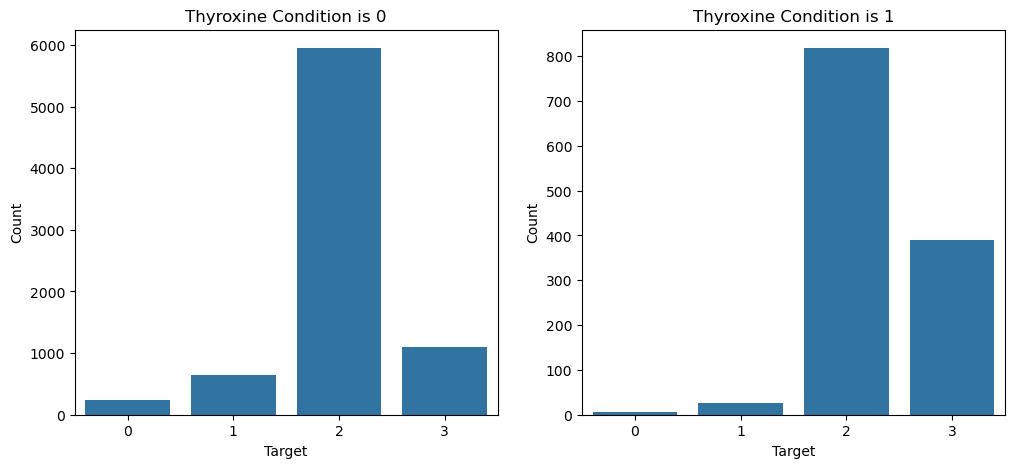

In [43]:
thyroxine0=df1[df1['on_thyroxine']==0]
thyroxine1=df1[df1['on_thyroxine']==1]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='target', data=thyroxine0, ax=axes[0])
axes[0].set_title('Thyroxine Condition is 0')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')
sns.countplot(x='target', data=thyroxine1, ax=axes[1])
axes[1].set_title('Thyroxine Condition is 1')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')

In [44]:
target_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print("Target Mapping:", target_mapping)


Target Mapping: {'Hyperthyroid': 0, 'Hypothyroid': 1, 'Negative': 2, 'Unknown': 3}


In [45]:
df.loc[(df['on_thyroxine'] == 1) & (df['target'] == 3), 'target'] = 1
df.loc[(df['on_thyroxine'] == 0) & (df['target'] == 3), 'target'] = 2


In [46]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target
0,29,1,0,0,0,0,1,0,0,0,0,0,0,0.3,0.0,104.0,0.976036,113.6389,5,2
1,29,1,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.976036,113.6389,5,2
2,41,1,0,0,0,0,0,1,0,0,0,0,0,1.4,0.0,104.0,0.976036,113.6389,5,2
3,36,1,0,0,0,0,0,0,0,0,0,0,0,1.4,0.0,104.0,0.976036,113.6389,5,2
4,32,1,0,0,0,0,0,0,0,0,0,0,0,1.4,0.0,104.0,0.976036,113.6389,5,2


In [47]:
df.sample(2)

,age,sex,on_thyroxine,on_antithyroid_meds,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target
5246,29,0,0,0,0,0,1,0,0,0,0,0,0,2.3,1.9,100.0,0.93,107.0,5,2
1529,59,0,0,0,0,0,0,0,0,0,0,0,0,24.0,8.9,218.0,0.83,264.0,5,0


<Axes: xlabel='T3'>

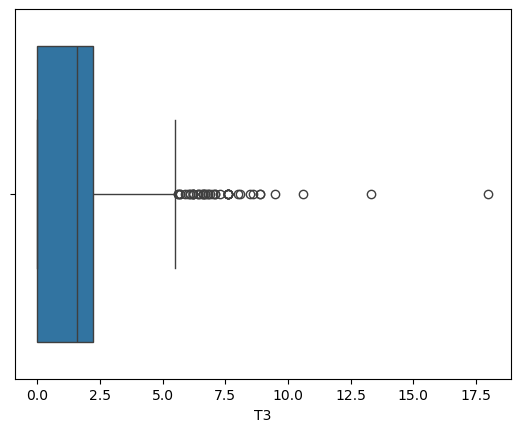

In [48]:
sns.boxplot(data=df,x=df["T3"])

In [49]:
q1_tsh=df['TSH'].quantile(0.25)
q3_tsh=df['TSH'].quantile(0.75)
iqr_tsh=q3_tsh-q1_tsh
lb_tsh = q1_tsh - 3 * iqr_tsh
ub_tsh = q3_tsh + 3 * iqr_tsh
outliers = df[(df['TSH'] < lb_tsh) | (df['TSH'] >ub_tsh )]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 640


In [50]:
q1_t3=df['T3'].quantile(0.25)
q3_t3=df['T3'].quantile(0.75)
iqr_t3=q3_t3-q1_t3
lb_t3 = q1_t3 - 3 * iqr_t3
ub_t3 = q3_t3 + 3 * iqr_t3
outliers = df[(df['T3'] < lb_t3) | (df['T3'] >ub_t3 )]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 6


In [51]:
df = df[(df['T3'] >= lb_t3) & (df['T3'] <= ub_t3)]

In [52]:
df.shape

(9162, 20)

In [53]:
from scipy import stats
df['z_score1']=stats.zscore(df['TT4'])
df=df[df['z_score1'].abs()<3]
df['z_score2']=stats.zscore(df['T4U'])
df=df[df['z_score2'].abs()<3]
df['z_score3']=stats.zscore(df['FTI'])
df=df[df['z_score3'].abs()<3]

In [54]:
df.shape

(8694, 23)

<Axes: xlabel='TSH', ylabel='T3'>

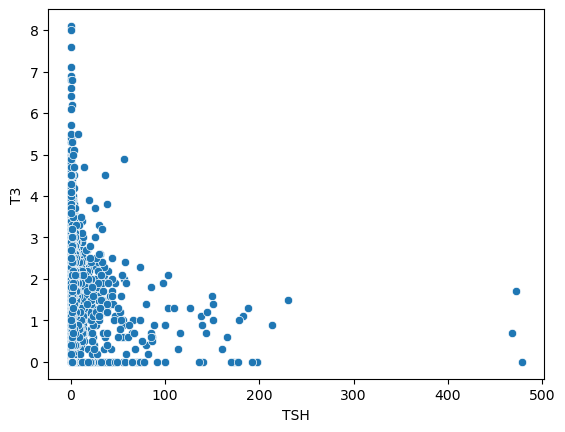

In [55]:
sns.scatterplot(data=df,x=df["TSH"],y=df["T3"])

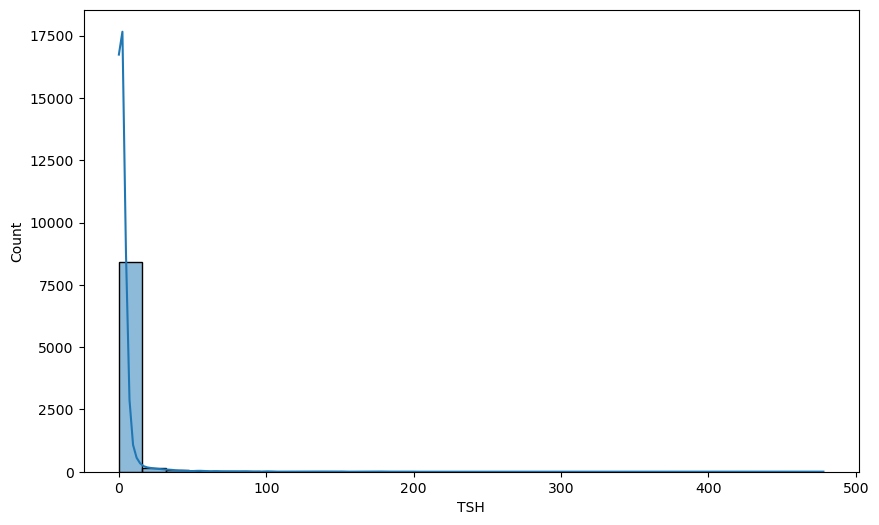

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TSH'],kde=True,bins=30)
plt.show()

In [57]:
import numpy as np
df['TSH'] = np.log(df['TSH'] + 1) 

In [58]:
q1_tsh=df['TSH'].quantile(0.25)
q3_tsh=df['TSH'].quantile(0.75)
iqr_tsh=q3_tsh-q1_tsh
lb_tsh = q1_tsh - 3 * iqr_tsh
ub_tsh = q3_tsh + 3 * iqr_tsh
outliers = df[(df['TSH'] < lb_tsh) | (df['TSH'] >ub_tsh )]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 126


In [59]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
clf=DecisionTreeClassifier(max_depth=5,max_features='sqrt',criterion='entropy',min_samples_split=5,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=5, random_state=42)

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

In [69]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_resampled_train, y_resampled_train = tl.fit_resample(X_train, y_train)


In [70]:
clf=DecisionTreeClassifier(max_depth=5,max_features='sqrt',criterion='entropy',min_samples_split=5,random_state=42)
clf.fit(X_resampled_train,y_resampled_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=5, random_state=42)

In [72]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0, 
            eval_set=[(X_train, y_train), (X_test, y_test)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [73]:
y_pred = xgb_clf.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.9844738355376653

In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[  18    0   11]
 [   0  184    5]
 [   2    9 1510]]
